# Compare models to see if data augmention worked

**Load augmented image dataset**

In [1]:

import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

import AugmentedDataLoader

# Load augmented datasets
augmented_train_ds, augmented_val_ds = AugmentedDataLoader.load_image_dataset("reptile_amphibian_pics")


2024-04-26 22:14:20.693400: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 22:14:20.731542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 22:14:20.731568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 22:14:20.733324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 22:14:20.740633: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 22:14:20.741163: I tensorflow/core/platform/cpu_feature_guard.cc:1

Found 1003 files belonging to 2 classes.
Using 803 files for training.
Using 200 files for validation.


2024-04-26 22:14:22.423906: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 22:14:22.424181: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# MobileNet Model

In [3]:
from keras.models import load_model

# Load saved model
model_1 = load_model("my_model2.keras")

In [6]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model_1.fit(augmented_train_ds, epochs=8, validation_data=augmented_val_ds)

Epoch 1/8
81/81 [==============================] - 8s 85ms/step - loss: 1.1634 - accuracy: 0.9054 - val_loss: 0.9086 - val_accuracy: 0.9200
Epoch 2/8
81/81 [==============================] - 7s 82ms/step - loss: 1.2560 - accuracy: 0.8892 - val_loss: 0.9549 - val_accuracy: 0.9150
Epoch 3/8
81/81 [==============================] - 7s 80ms/step - loss: 1.0483 - accuracy: 0.9128 - val_loss: 1.4259 - val_accuracy: 0.8800
Epoch 4/8
81/81 [==============================] - 8s 101ms/step - loss: 0.9619 - accuracy: 0.9178 - val_loss: 1.0517 - val_accuracy: 0.8950
Epoch 5/8
81/81 [==============================] - 7s 86ms/step - loss: 0.8474 - accuracy: 0.9253 - val_loss: 1.0098 - val_accuracy: 0.9250
Epoch 6/8
81/81 [==============================] - 7s 89ms/step - loss: 1.8846 - accuracy: 0.8593 - val_loss: 1.0869 - val_accuracy: 0.9150
Epoch 7/8
81/81 [==============================] - 7s 87ms/step - loss: 1.2423 - accuracy: 0.8929 - val_loss: 1.1004 - val_accuracy: 0.9100
Epoch 8/8
81/81 [==

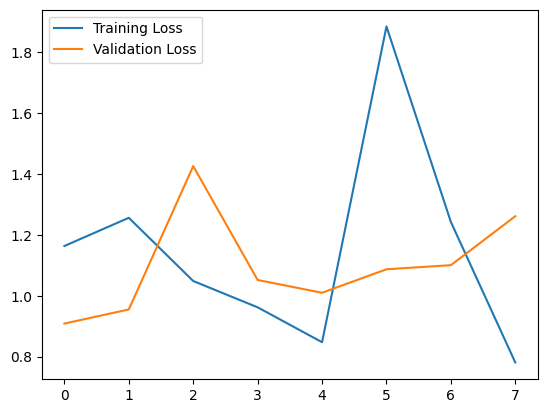

In [8]:

plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

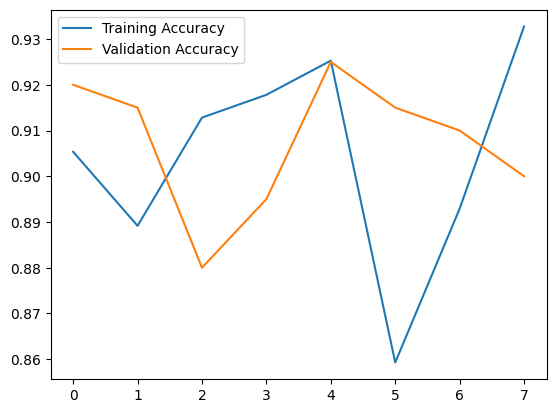

In [10]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training Accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

# MobileNetV2

In [11]:
model_2 = load_model("my_model4.keras")

In [14]:
history2 = model_2.fit(augmented_train_ds, epochs=8, validation_data=augmented_val_ds)


Epoch 1/8
81/81 [==============================] - 10s 105ms/step - loss: 0.7146 - accuracy: 0.9315 - val_loss: 1.0528 - val_accuracy: 0.9050
Epoch 2/8
81/81 [==============================] - 8s 100ms/step - loss: 0.6679 - accuracy: 0.9377 - val_loss: 0.9825 - val_accuracy: 0.9200
Epoch 3/8
81/81 [==============================] - 8s 97ms/step - loss: 0.5446 - accuracy: 0.9527 - val_loss: 0.9766 - val_accuracy: 0.9200
Epoch 4/8
81/81 [==============================] - 8s 102ms/step - loss: 0.6330 - accuracy: 0.9527 - val_loss: 0.9563 - val_accuracy: 0.9200
Epoch 5/8
81/81 [==============================] - 8s 104ms/step - loss: 1.9080 - accuracy: 0.8543 - val_loss: 2.0507 - val_accuracy: 0.8450
Epoch 6/8
81/81 [==============================] - 8s 103ms/step - loss: 1.7247 - accuracy: 0.8593 - val_loss: 1.1670 - val_accuracy: 0.9100
Epoch 7/8
81/81 [==============================] - 8s 104ms/step - loss: 1.1297 - accuracy: 0.9128 - val_loss: 1.1541 - val_accuracy: 0.9150
Epoch 8/8
81/

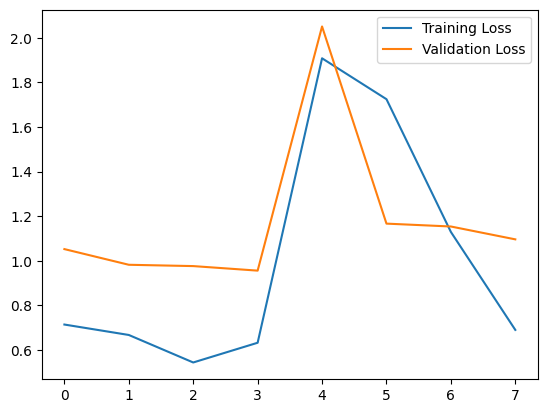

In [15]:
plt.plot(range(len(history2.history["loss"])),history2.history["loss"],label="Training Loss")
plt.plot(range(len(history2.history["val_loss"])),history2.history["val_loss"],label="Validation Loss")
plt.legend()

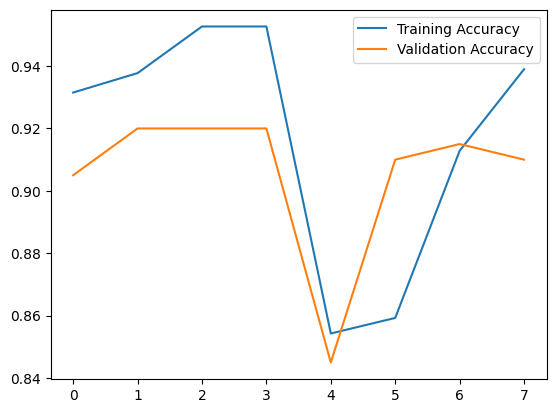

In [17]:
plt.plot(range(len(history2.history["accuracy"])),history2.history["accuracy"],label="Training Accuracy")
plt.plot(range(len(history2.history["val_accuracy"])),history2.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

# InceptionV3

In [2]:
from keras.models import load_model

model_3 = load_model("my_model6.keras")

In [4]:
history3 = model_3.fit(augmented_train_ds, epochs=8, validation_data=augmented_val_ds)

Epoch 1/8
81/81 [==============================] - 31s 347ms/step - loss: 0.4797 - accuracy: 0.9589 - val_loss: 0.5614 - val_accuracy: 0.9500
Epoch 2/8
81/81 [==============================] - 30s 368ms/step - loss: 0.4689 - accuracy: 0.9626 - val_loss: 0.5617 - val_accuracy: 0.9500
Epoch 3/8
81/81 [==============================] - 34s 416ms/step - loss: 0.4593 - accuracy: 0.9614 - val_loss: 0.5833 - val_accuracy: 0.9450
Epoch 4/8
81/81 [==============================] - 38s 467ms/step - loss: 0.4571 - accuracy: 0.9601 - val_loss: 0.5614 - val_accuracy: 0.9550
Epoch 5/8
81/81 [==============================] - 37s 457ms/step - loss: 0.3851 - accuracy: 0.9664 - val_loss: 0.5598 - val_accuracy: 0.9550
Epoch 6/8
81/81 [==============================] - 36s 447ms/step - loss: 0.4148 - accuracy: 0.9689 - val_loss: 0.5591 - val_accuracy: 0.9500
Epoch 7/8
81/81 [==============================] - 36s 441ms/step - loss: 0.4537 - accuracy: 0.9626 - val_loss: 0.5593 - val_accuracy: 0.9500
Epoch 

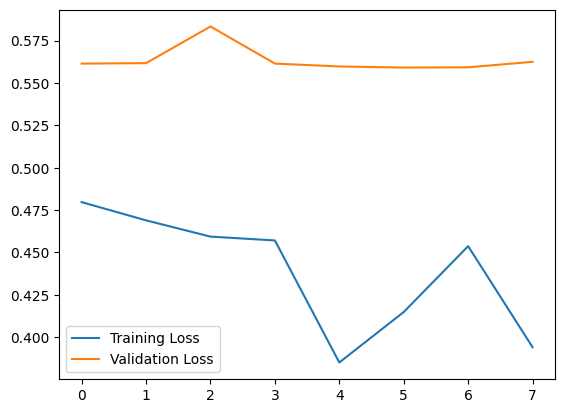

In [5]:
plt.plot(range(len(history3.history["loss"])),history3.history["loss"],label="Training Loss")
plt.plot(range(len(history3.history["val_loss"])),history3.history["val_loss"],label="Validation Loss")
plt.legend()

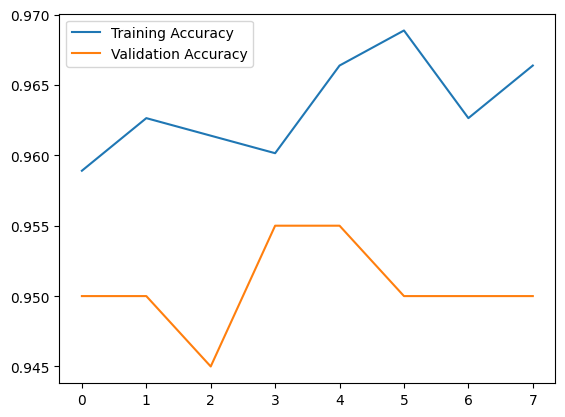

In [7]:
plt.plot(range(len(history3.history["accuracy"])),history3.history["accuracy"],label="Training Accuracy")
plt.plot(range(len(history3.history["val_accuracy"])),history3.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

# Comparisons

**MobileNet**  
final training accuracy: 0.9328 and training loss: 0.7808 
final val accuracy: 0.9000 and val loss: 1.2613

+ The accuracy and loss are pretty good, but the issue are the curves. The curves jump all over the place and the training and validation curves cross each other three times for both accuracy and loss.
+ Not well adjusted to the augmented data and should have further hyperparameter tuning in the future.

**MobileNetV2**  
final training accuracy: 0.9390 and training loss: 0.6906  
final val accuracy: 0.9100 and val loss: 1.0965

+ For this model the accuracy and loss are even better than the first mobilenet. The curves are also more parallel at the beginning and end of the plot, however there is one big jump and two instances of the training and validation curve intersecting with each other. It is a much better model than mobilienet but still needs more tuning. 

**InceptionV3**  
final training accuracy: 0.9664 and training loss: 0.3941  
final val accuracy: 0.9500 and val loss: 0.5625

+ For this model the accuracy and loss are even better than the mobilenet2. The curves show that these are parallel and do not have any intersections between trianing and validation. There are some jumps however, but not a lot only 1-4.

Overall, MobileNet performed the worst, then MobileNetV2 did better, and InceptionV3 did the best. The curves for augmented images was much more jumpy than the original images, which means that the augmentation is definitely working in increasing the dataset and getting it used to more messy images. However, there should be some major hyperparameter tuning to the models to improve the curves and make them less jumpy and more parallel.

InceptionV3 >> MobileNetV2 >> MobileNet

**The InceptionV3 transfer learning model performed the best as it had the lowest loss and the highest accuract for both training and validation as well as had the more parallel and flattest curve.**
